# Previas Conjugadas

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/1/18/Bayes%27_Theorem_MMB_01.jpg" width="500px" height="300px" />

> Introduciremos la idea de previas conjugadas y veremos algunos ejemplos. Veremos como las previas conjugadas simplifican el trabajo de actualización Bayesiana.

> **Objetivos:**
> - Familiarizarse con la distribución beta.
> - Comprender los beneficios de las previas conjugadas.
> - Actualizar una previa beta dada una verosimilitud de Bernoulli, Binomial o Geométrica.
> - Retomar la actualización de una previa normal dada una verosimilitud normal con varianza conocida.

> **Referencias:**
> - https://ocw.mit.edu/courses/18-05-introduction-to-probability-and-statistics-spring-2022/mit18_05_s22_statistics.pdf

## 1. Distribución Beta

La distribución beta $\text{Beta}(a,b)$ es una distribución de dos parámetros con soporte $[0, 1]$ y densidad

$$
p(\theta) = \frac{(a + b - 1)!}{(a-1)! (b-1)!}\theta^{a-1} (1 - \theta)^{b-1}.
$$

En el [este enlace](https://mathlets.org/mathlets/beta-distribution/) podemos ver diferentes formas de la distribución beta de acuerdo a los parámetros.

> En el contexto de actualización Bayesiana $a$ y $b$ se llaman *hiperperámetros* para diferenciarlos del parámetro desconocido $\theta$ que representa nuestra hipótesis. De cierto modo, $a$ y $b$ están un "nivel arriba" de $\theta$ dado que parametrizan su densidad.

### 1.1. Nota IMPORTANTE

Si una densidad $p(\theta)$ con soporte $[0, 1]$ tiene la forma $c \theta^{a-1} (1 - \theta)^{b-1}$ entonces $p(\theta)$ es una distribución $\text{Beta}(a, b)$ y  la constante de normalización es:

$$
c = \frac{(a + b - 1)!}{(a-1)! (b-1)!}.
$$

Esta constante de normalización es única, y normaliza la densidad para que la probabilidad total sea 1.

Esto aplica para todas las distribuciones (normal, exponencial, etc.). Por ejemplo, si una densidad tiene la forma

$$
p(\theta) = k e^{-(\theta - \mu)^2/2\sigma^2},
$$

entonces $p(\theta)$ es una distribución $\text{Normal}(\mu, \sigma^2)$, y la constante de normalización es:

$$
k = \frac{1}{\sigma \sqrt{2 \pi}}.
$$

### 1.2. Previa y posterior beta para verosimilitudes binomiales.

**Ejemplo.** Suponga que tenemos una moneda con probabilidad desconocida $\theta$ de que caiga cara. La tiramos 12 veces y obtenemos 8 caras y 4 sellos. Si suponemos que tenemos una previa plana $\text{Uniforme}(0, 1)$ cuál es la posterior?

<details>
  <summary>Descubrir</summary>
  
Consideramos los datos de los 12 tiros como $x_1$, y con esto armamos nuestra tabla de actualización:

| Hipótesis | Previa | Verosimilitud                                                           | Numerador de Bayes                                      | Posterior                  |
| --------- | ------ | ----------------------------------------------------------------------- | ------------------------------------------------------- | -------------------------- |
| $\theta$  | $1$    | $\left(\begin{array}{c}12 \\ 8 \end{array}\right) \theta^8(1-\theta)^4$ | $c_1 \theta^8(1-\theta)^4$ | $c_2 \theta^8(1-\theta)^4$ | $c_2 \theta^8(1-\theta)^4$ |
|           |                                                                                  |                                                         |                            |
| total     | $1$    | NO SUMA                                                                 | $const.$                                                | $1$                        |

Notamos que la posterior es una pdf beta con $a=9$ y $b=5$, es decir

$$
p(\theta | x_1) = c_2 \theta^8(1-\theta)^4, \qquad \text{donde } c_2 = \frac{13!}{8! \cdot 4!}.
$$
</details>

In [1]:
from scipy import stats
import numpy as np
from matplotlib import pyplot as plt

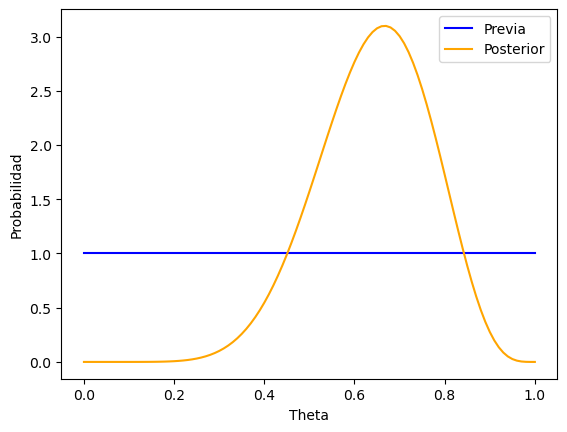

In [2]:
# Vector de theta de 0 a 1 con 101 puntos
theta = np.linspace(0, 1, 101)
# Distribución previa uniforme para theta
previa = stats.beta.pdf(theta, 1, 1)
# Posterior beta
posterior = stats.beta.pdf(theta, 9, 5)

# Graficamos
plt.plot(theta, previa, label='Previa', color='blue')
plt.plot(theta, posterior, label='Posterior', color='orange')
plt.xlabel('Theta')
plt.ylabel('Probabilidad')
plt.legend()


**Ejemplo.** Ahora supongamos que tiramos la misma moneda nuevamente obteniendo $n$ caras y $m$ sellos. Usando la posterior que obtuvimos en el ejemplo anterior como previa, obtengamos la nueva distribución posterior.

<details>
  <summary>Descubrir</summary>
  
Consideramos los datos de los nuevos tiros como $x_2$, y con esto armamos nuestra tabla de actualización:

| Hipótesis | Previa                     | Verosimilitud              | Numerador de Bayes                     | Posterior                          |
| --------- | -------------------------- | -------------------------- | -------------------------------------- | ---------------------------------- |
| $\theta$  | $c_2 \theta^8(1-\theta)^4$ | $c_3 \theta^n(1-\theta)^m$ | $c_2 c_3 \theta^{n+8}(1-\theta)^{m+4}$ | $c_4 \theta^{n+8}(1-\theta)^{m+4}$ |
|           |                            |                            |                                        |                                    |
| total     | $1$                        | NO SUMA                    | $const.$                               | $1$                                |

Notamos que la posterior es $\text{Beta}(n+9, m+5)$, es decir

$$
p(\theta | x_1) = c_4 \theta^{n+8}(1-\theta)^{m+4}.
$$
</details>

In [3]:
# Distribución previa uniforme para theta
previa = stats.beta.pdf(theta, 9, 5)
# Posterior beta
n, m =  10, 15
posterior = stats.beta.pdf(theta, n + 9, m + 5)

In [4]:
n+9, m+5

(19, 20)

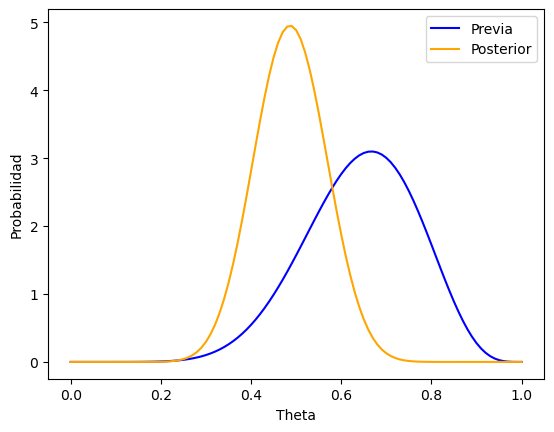

In [5]:
# Graficamos
plt.plot(theta, previa, label='Previa', color='blue')
plt.plot(theta, posterior, label='Posterior', color='orange')
plt.xlabel('Theta')
plt.ylabel('Probabilidad')
plt.legend()

#### Notas:

1. Notemos que la distribución $\text{Beta}(1, 1)$ corresponde exactamente a una distribución $\text{Uniforme}(0, 1)$.
   
   $$
   p(\theta) = \left.\frac{(a + b - 1)!}{(a-1)! (b-1!)}\theta^{a-1} (1 - \theta)^{b-1}\right|_{a=b=1} = \frac{(1 + 1 - 1)!}{(1-1)! (1-1!)}\theta^{1-1} (1 - \theta)^{1-1} = \frac{1!}{0! 0!}\theta^{0} (1 - \theta)^{0} = 1.
   $$

2. En general, 
   - si la probabilidad de cara es $\theta$,
   - si el número de caras en $n+m$ tiros de una moneda sigue una distribución $\text{Binomial}(n+m, \theta)$,
   - si la previa sobre $\theta$ es una distribución $\text{Beta}(a, b)$

   la posterior será nuevamente una distribución $\text{Beta}(n+a, m+b)$, como vemos en la tabla de actualización:

   | Hipótesis | Previa                               | Verosimilitud                    |  Posterior                               |
   | --------- | ------------------------------------ | -------------------------------- | ---------------------------------------- |
   | $\theta$  | $\text{Beta}(a, b)$                  | $\text{Binomial}(n+m, \theta)$   | $\text{Beta}(a+n, b+m)$                  |
   | $\theta$  | $c_1\theta^{a-1} (1 - \theta)^{b-1}$ | $c_2\theta^{n} (1 - \theta)^{m}$ | $c_3\theta^{a+n-1} (1 - \theta)^{b+m-1}$ |

## 2. Previas conjugadas

La distribución beta es llamada una distribución previa conjugada para la distribución binomial. Esto significa que si la verosimilitud es binomial, entonces una previa beta resulta en una posterior beta, como vimos en los ejemplos anteriores.

De hecho, la distribución beta es previa conjugada de las distribuciones Bernoulli y geométrica también.

Veremos que este no es el único caso. Por ejemplo, la distribución normal es su propia previa conjugada. Es decir, si la verosimilitud es normal con varianza conocida, entonces una previa normal resulta en una posterior normal.

Las previas conjugadas son útiles porque reducen la actualización Bayesiana a modificar los parámetros de la distribución previa (hiperparámetros), sin tener que calcular integrales complicadas. Hay varios ejemplos de distribuciones previas conjugadas, que se pueden encontrar en [este enlace](https://en.wikipedia.org/wiki/Conjugate_prior).

**Definición.** Supongamos que tenemos ciertos datos con verosimilitud $p(x|\theta)$. Además, supongamos que la previa para $\theta$, $p(\theta)$, es de cierta familia de distribuciones. Si la distribución posterior para $\theta$, $p(\theta|x)$, pertenece a la misma familia de distribuciones que la previa, decimos que dicha familia de previas son previas conjugadas para la verosimilitud.

### 2.1. Previas beta

#### Binomial

Antes vimos que la distribución beta es una previa conjugada para la distribución binomial. Lo resumimos en la siguiente tabla:

| Hipótesis | Datos | Previa                                         | Verosimilitud                                  | Posterior                                                |
| --------- | ----- | ---------------------------------------------- | ---------------------------------------------- | -------------------------------------------------------- |
| $\theta$  | $x$   | $\text{Beta}(a, b)$                            | $\text{Binomial}(N, \theta)$                   | $\text{Beta}(a+x, b+N-x)$                                |
| $\theta$  | $x$   | $p(\theta)=c_1\theta^{a-1} (1 - \theta)^{b-1}$ | $p(x\|\theta)=c_2\theta^{x} (1 - \theta)^{N-x}$ | $p(\theta\|x)=c_3\theta^{a+x-1} (1 - \theta)^{b+N-x-1}$ |

Cuando hablamos de previas conjugadas, no importa mucho los coeficientes de normalización en la tabla de actualización. Esto porque se pueden recuperar de las formas estándar de las distribuciones correspondientes. Por ejemplo, en este caso, los coeficientes $c_1$, $c_2$ y $c_3$ son:

$$
c_1 = \frac{(a + b - 1)!}{(a - 1)! (b - 1)!} \qquad c_2 = \left(\begin{array}{c}N \\ x \end{array}\right) = \frac{N!}{x!(N-x)!} \qquad c_3 = \frac{(a+b+N-1)!}{(a+x-1)!(b+N-x-1)!}.
$$

**Ejemplo.** Supongamos que, en el reino de los hongos, Mario Bros encuentra una moneda algo rara. Dadas las monedas que se encuentran normalmente, Mario tiene algo de evidencia de que la moneda es justa, por lo que elige una previa:

$$
\theta \sim \text{Beta}(5, 5).
$$

Para invistigar más a fondo la moneda, Mario decide tirarla cinco veces. Obtiene cuatro caras y un sello.

Calcular la distribución posterior y dibujarlas.

<details>
  <summary>Descubrir</summary>
  
De acuerdo a lo anterior, tenemos que

$$
(\theta | {1, 1, 1, 1, 0}) \sim \text{Beta}(9, 6)
$$
</details>

In [6]:
# Definir previa
previa = stats.beta.pdf(theta, 5, 5)
# Definir posterior (4 caras, 1 sello)
posterior = stats.beta.pdf(theta, 9, 6)

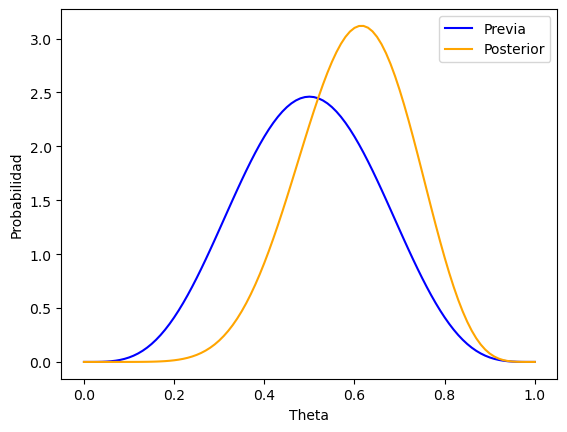

In [7]:
# Dibujar
plt.plot(theta, previa, label='Previa', color='blue')
plt.plot(theta, posterior, label='Posterior', color='orange')
plt.xlabel('Theta')
plt.ylabel('Probabilidad')
plt.legend()

#### Bernoulli

Sabemos que la distribución de Bernoulli es un caso especial de la distribución binomial. Por tanto la distribución beta es previa conjugada de la distribución de Bernoulli.

> **Tarea.** Completar la tabla de actualización:
>
> | Hipótesis | Datos | Previa                                         | Verosimilitud               | Posterior                                               |
> | --------- | ----- | ---------------------------------------------- | --------------------------- | ------------------------------------------------------- |
> | $\theta$  | $x$   | $\text{Beta}(a, b)$                            | $\text{Bernoulli}(\theta)$  | ?                                                       |
> | $\theta$  | $x=1$ | $p(\theta)=c_1\theta^{a-1} (1 - \theta)^{b-1}$ | $p(x\|\theta)=\theta$       | ?                                                       |
> | $\theta$  | $x=0$ | $p(\theta)=c_1\theta^{a-1} (1 - \theta)^{b-1}$ | $p(x\|\theta)=(1 - \theta)$ | ?                                                       |

> Si se tienen constantes en la tabla, como por ejemplo $c_1$, especificarlas completamente como en el caso Binomial.

#### Geométrica

> **Tarea.** Completar la tabla de actualización:
>
> | Hipótesis | Datos | Previa                                         | Verosimilitud                     | Posterior                                               |
> | --------- | ----- | ---------------------------------------------- | --------------------------------- | ------------------------------------------------------- |
> | $\theta$  | $x$   | $\text{Beta}(a, b)$                            | $\text{Geometrica}(\theta)$       | ?                                                       |
> | $\theta$  | $x$   | $p(\theta)=c_1\theta^{a-1} (1 - \theta)^{b-1}$ | $p(x\|\theta)=\theta^x(1-\theta)$ | ?                                                       |

> Si se tienen constantes en la tabla, como por ejemplo $c_1$, especificarlas completamente como en el caso Binomial.

### 2.2. La distribución normal es su propia previa conjugada.

Retomamos lo que comentamos hace un momento:

> La distribución normal es su propia previa conjugada. Es decir, si la verosimilitud es normal con varianza conocida, entonces una previa normal resulta en una posterior normal.

Supongamos que tenemos un dato $x \sim \text{Normal}(\theta, \sigma^2)$, donde la varianza $\sigma^2$ es conocida. Es decir, la media $\theta$ es nuestro parámetro deconocido de interés. Si elegimos una previa normal

$$
\theta \sim \text{Normal}(\mu_0, \sigma_0^2),
$$

entonces la posterior también es normal $(\theta | x) \sim \text{Normal}(\mu_1, \sigma_1^2)$, donde

$$
\frac{\mu_1}{\sigma_1^2} = \frac{\mu_0}{\sigma_0^2} + \frac{x}{\sigma^2}, \qquad \frac{1}{\sigma_1^2} = \frac{1}{\sigma_0^2} + \frac{1}{\sigma^2},
$$

o equivalentemente

$$
\mu_1 = \frac{\mu_0 / \sigma_0^2 + x / \sigma^2}{1 / \sigma_0^2 + 1 / \sigma^2} = \frac{\sigma^2 \mu_0 + \sigma_0^2 x}{\sigma_0^2 + \sigma^2}, \qquad \sigma_1^2 = \frac{1}{1 / \sigma_0^2 + 1 / \sigma^2} = \frac{\sigma_0^2\sigma^2}{\sigma_0^2 + \sigma^2}
$$

> **Tarea.** Demostrar las fórmulas anteriores. Ayuda en clase.

Con lo anterior, podemos escribir la siguiente tabla de actualización:

| Hipótesis | Datos | Previa                                                 | Verosimilitud                                      | Posterior                                                |
| --------- | ----- | ------------------------------------------------------ | -------------------------------------------------- | -------------------------------------------------------- |
| $\theta$  | $x$   | $\text{Normal}(\mu_0, \sigma_0^2)$                     | $\text{Normal}(\theta, \sigma^2)$                  | $\text{Normal}(\mu_1, \sigma_1^2)$                       |
| $\theta$  | $x$   | $p(\theta)=c_1 e^{-(\theta - \mu_0)^2 / 2 \sigma_0^2}$ | $p(x\|\theta)=c_2e^{-(x - \theta)^2 / 2 \sigma^2}$ | $p(\theta\|x)=c_3e^{-(\theta - \mu_1)^2 / 2 \sigma_1^2}$ |

**Ejemplo.** Supongamos que tenemos un dato $x_1=3$ que proviene de una distribución normal con varianza conocida $x \sim \text{Normal}(\theta, 5)$. Suponga que tenemos la previa $\theta \sim \text{Normal}(4, 8)$. Calcular la distribución posterior y dibujarlas.

In [16]:
# Definición de verosimilitud y previa
x = 3
sigma2 = 5
mu0 = 4
sigma02 = 8

In [18]:
# Parámetros de la posterior
mu1 = (sigma2 * mu0 + sigma02 * x) / (sigma2 + sigma02)
sigma12 = 1 / (1/sigma2 + 1/sigma02)
mu1, sigma12

(3.3846153846153846, 3.0769230769230766)

$$
\mu_1 = \frac{\mu_0 / \sigma_0^2 + x / \sigma^2}{1 / \sigma_0^2 + 1 / \sigma^2} = \frac{\sigma^2 \mu_0 + \sigma_0^2 x}{\sigma_0^2 + \sigma^2}, \qquad \sigma_1^2 = \frac{1}{1 / \sigma_0^2 + 1 / \sigma^2} = \frac{\sigma_0^2\sigma^2}{\sigma_0^2 + \sigma^2}
$$

<details>
  <summary>Descubrir</summary>
  
De acuerdo a lo anterior, tenemos que:

$$
\mu_1 = \frac{5 \times 4 + 8 \times 3}{8 + 5} = \frac{44}{13}, \qquad \sigma_1^2 = \frac{8 \times 5}{8 + 5} = \frac{40}{13}.
$$

Por tanto, la posterior es:

$$
(\theta | x_1) \sim \text{Normal}(44/13, 40/13).
$$
</details>

In [19]:
x1 = np.linspace(-6, 12, 1001)
# Definir previa
prior = stats.norm.pdf(x1, loc=mu0, scale=np.sqrt(sigma02))
# Definir posterior
posterior = stats.norm.pdf(x1, loc=mu1, scale=np.sqrt(sigma12))

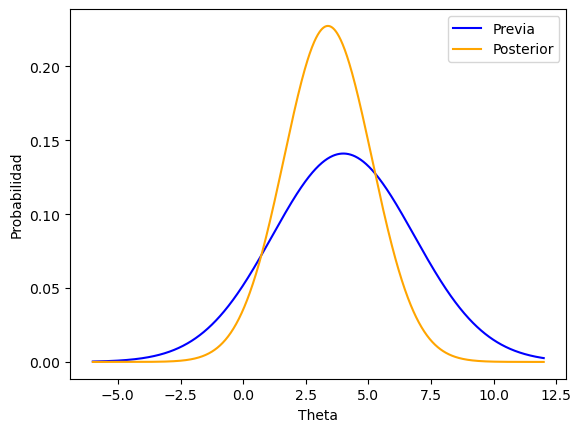

In [20]:
# Dibujar
plt.plot(x1, prior, label='Previa', color='blue')
plt.plot(x1, posterior, label='Posterior', color='orange')
plt.xlabel('Theta')
plt.ylabel('Probabilidad')
plt.legend()

#### Más de un dato

Suponga que tenemos datos $x_1, x_2, x_3$. Usamos las fórmulas anteriores para actualizar de forma secuencial:

- Paso 1: tenemos previa $\text{Normal}(\mu_0, \sigma_0^2)$.

  $$
  \frac{\mu_1}{\sigma_1^2} = \frac{\mu_0}{\sigma_0^2} + \frac{x_1}{\sigma^2}, \qquad \frac{1}{\sigma_1^2} = \frac{1}{\sigma_0^2} + \frac{1}{\sigma^2},
  $$

- Paso 2: Ahora, la previa es $\text{Normal}(\mu_1, \sigma_1^2)$

  $$
  \frac{\mu_2}{\sigma_2^2} = \frac{\mu_1}{\sigma_1^2} + \frac{x_2}{\sigma^2} =  \frac{\mu_0}{\sigma_0^2} + \frac{x_1 + x_2}{\sigma^2}, \qquad \frac{1}{\sigma_2^2} = \frac{1}{\sigma_1^2} + \frac{1}{\sigma^2} = \frac{1}{\sigma_0^2} + \frac{2}{\sigma^2},
  $$

- Paso 3: Ahora, la previa es $\text{Normal}(\mu_2, \sigma_2^2)$

  $$
  \frac{\mu_3}{\sigma_3^2} = \frac{\mu_2}{\sigma_2^2} + \frac{x_3}{\sigma^2} =  \frac{\mu_0}{\sigma_0^2} + \frac{x_1 + x_2 + x_3}{\sigma^2}, \qquad \frac{1}{\sigma_3^2} = \frac{1}{\sigma_2^2} + \frac{1}{\sigma^2} = \frac{1}{\sigma_0^2} + \frac{3}{\sigma^2},
  $$

Observamos que, en general:

$$
\frac{\mu_{post}}{\sigma_{post}^2} = \frac{\mu_{prev}}{\sigma_{prev}^2} + \frac{n \cdot \bar{x}}{\sigma^2}, \qquad \frac{1}{\sigma_{post}^2} = \frac{1}{\sigma_0^2} + \frac{n}{\sigma^2},
$$

con $\bar{x} = \frac{x_1 + x_2 + \dots + x_n}{n}$ el promedio muestral.

**Nota.** A medida que la cantidad de datos $n$ es mayor:

- menos influencia tiene la previa en $\mu_{post}$;
- menor es la varianza de la posterior.

In [39]:
# Definimos la previa
mu0 = 100
sigma02 = 8

In [40]:
# Número de datos
n_data = 100
# Theta fija y varianza conocida
theta_true = 3
sigma2 = 5
# Datos
data = np.random.normal(loc=theta_true, scale=np.sqrt(sigma2), size=n_data)

In [41]:
# Varianza posterior
sigma12 = 1 / (n_data/sigma2 + 1/sigma02)
# Media posterior
mu1 = sigma12 * (mu0/sigma02 + n_data * np.mean(data)/sigma2)
mu1, sigma12

(3.3109824771180665, 0.049689440993788817)

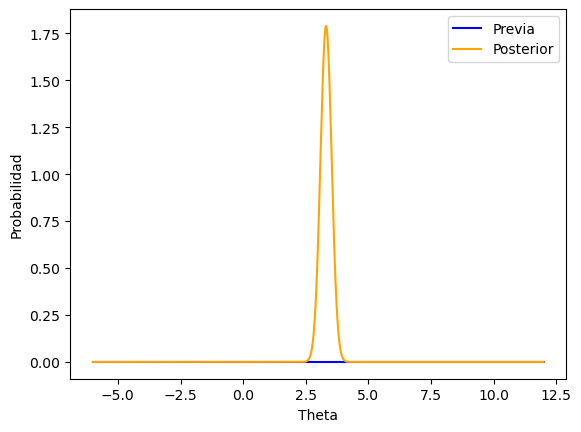

In [42]:
# Dibujar
x1 = np.linspace(-6, 12, 1001)
plt.plot(x1, stats.norm.pdf(x1, loc=mu0, scale=np.sqrt(sigma02)), label='Previa', color='blue')
plt.plot(x1, stats.norm.pdf(x1, loc=mu1, scale=np.sqrt(sigma12)), label='Posterior', color='orange')
plt.xlabel('Theta')
plt.ylabel('Probabilidad')
plt.legend()


## Anuncios:

1. La siguiente clase ____ hay quiz del tema 4.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>